# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 1. `Numpy`, `matplotlib`, `scipy.stats`

При возникновении сложностей, связанных с Питоном и библиотеками, посмотрите материалы видео-курса <a href="https://mipt-stats.gitlab.io/courses/python.html">Python для анализа данных</a>. Если не помогло, задайте вопрос по заданию.

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb. 
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.

**Баллы за задание:**

<font color="blue"><b>Легкая часть</b></font> (достаточно на "хор"):
* Задача 1.1 — 3 балла
* Задача 1.2 — 3 балла
* Задача 2 — 3 балла

<font color="orange"><b>Сложная часть</b></font> (необходимо на "отл"):
* Задача 1.3 — 3 балла
* Задача 3.1 — 3 балла
* Задача 3.2 — 3 балла
* Задача 3.3 — 3 балла
* Задача 4 — 4 балла


In [1]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets

import typing

%matplotlib inline

### <font color="blue"><i>Легкая часть: генерация</i></font>

<font color="red">В этой части другие библиотеки использовать запрещено. Шаблоны кода ниже менять нельзя. </font>

### Задача 1
Имеется симметричная монета. Напишите функцию генерации независимых случайных величин из нормального и экспоненциального распределений с заданными параметрами.

In [2]:
# Эта ячейка -- единственная в задаче 1, в которой нужно использовать
# библиотечную функция для генерации случайных чисел.
# В других ячейках данной задачи используйте функцию coin.

# симметричная монета
coin = sps.bernoulli(0.5).rvs

Проверьте работоспособность функции, сгенерировав 10 бросков симметричной монеты.

In [3]:
coin(10)

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1])

**Часть 1.** Напишите сначала функцию генерации случайных величин из равномерного распределения на отрезке $[0, 1]$ с заданной точностью. Это можно сделать, записав случайную величину $\xi \sim U[0, 1]$ в двоичной системе системе счисления $\xi = 0,\xi_1\xi_2\xi_3...$. Тогда $\xi_i \sim Bern(1/2)$ и независимы в совокупности. Приближение заключается в том, что вместо генерации бесконечного количества $\xi_i$ мы полагаем $\xi = 0,\xi_1\xi_2\xi_3...\xi_n$.

Нужно реализовать функцию нужно так, чтобы она могла принимать на вход в качестве параметра `size` как число, так и объект `tuple` любой размерности, и возвращать объект `numpy.array` соответствующей размерности. Например, если `size=(10, 1, 5)`, то функция должна вернуть объект размера $10 \times 1 \times 5$. Кроме того, функцию `coin` можно вызвать только один раз, и, конечно же, не использовать какие-либо циклы. Аргумент `precision` отвечает за число $n$.

In [4]:
def uniform(size=1, precision=30):
    generate = coin(np.prod(size) * precision).reshape(np.prod(size), precision)
    multipier = np.geomspace(0.5,0.5**precision,precision)
    return (generate @ multipier).reshape(size)
uniform((3,3))

array([[0.31708319, 0.55586844, 0.40443348],
       [0.06431918, 0.24967095, 0.7438812 ],
       [0.94219434, 0.32674591, 0.20543891]])

Для $U[0, 1]$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам.

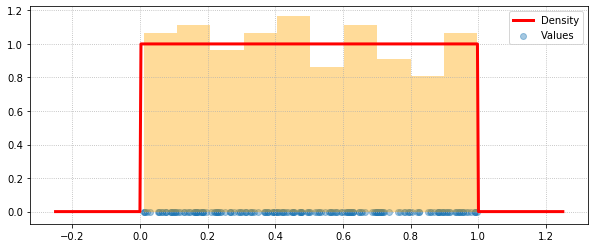

In [5]:
size = 200
grid = np.linspace(-0.25,1.25,500)

sample = uniform(size, precision = 50)

# Отрисовка графика
plt.figure(figsize = (10,4))

plt.scatter(
    sample, 
    np.zeros(size), 
    alpha = 0.4, 
    label = "Values"
)

plt.hist(
    sample, 
    bins = 10, 
    density = True, 
    alpha = 0.4, 
    color = "Orange"
)

plt.plot(
    grid,
    sps.uniform.pdf(grid),
    linewidth=3,
    color = "Red",
    label = "Density"
    
)


plt.legend()
plt.grid(ls=':')
plt.show()

Исследуйте, как меняются значения случайных величин в зависимости от `precision`.

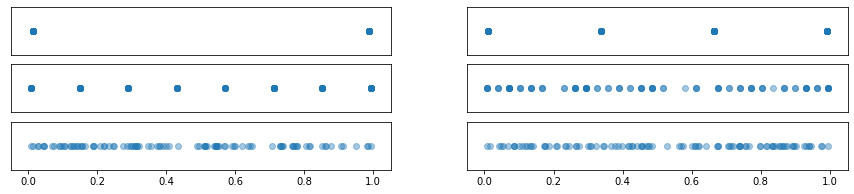

In [9]:
size = 100

plt.figure(figsize = (15,3))

for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
    plt.subplot(3, 2, i + 1)
    plt.scatter(
        uniform(size,precision), 
        np.zeros(size), 
        alpha = 0.4
    )
    plt.yticks([])
    if i < 4: plt.xticks([])

plt.show()

**Вывод:**
Чем выше точность, чем больше значений принимает случайная величина.

**Часть 2.** Напишите функцию генерации случайных величин в количестве `size` штук из распределения $\mathcal{N}(loc, scale^2)$ с помощью преобразования Бокса-Мюллера, которое заключается в следующем. Пусть $\xi$ и $\eta$ — независимые случайные величины, равномерно распределенные на $(0, 1]$. Тогда случайные величины $X = cos(2\pi\xi)\sqrt{-2\ln\eta}, Y = sin(2\pi\xi)\sqrt{-2\ln\eta}$ являются независимыми нормальными $\mathcal{N}(0, 1)$.

Реализация должна быть без циклов. В качестве параметра `size` может быть как число, так и объект `tuple` любой размерности. Желательно использовать как можно меньше бросков монеты. Можно использовать реализованную ранее функцию `uniform`.

In [6]:
def normal(size=1, loc=0, scale=1, precision=30):
    rand_1, rand_2 = uniform(size,precision), uniform(size, precision)
    return loc + scale * np.cos(2 * np.pi * rand_1) * np.sqrt(-2 * np.log(rand_2))

Для $\mathcal{N}(0, 1)$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-3, 3]$, а также гистограмму по сгенерированным случайным величинам.

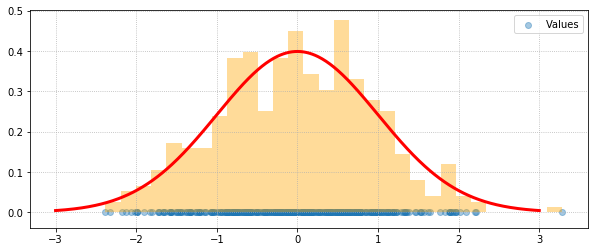

In [9]:
size = 200
grid = np.linspace(-3, 3, 500)

sample = normal(size, 0, 1, 100)
plt.figure(figsize = (10, 4))
plt.scatter(
    sample,
    np.zeros(size),
    alpha=0.4,
    label='Values'
)

plt.hist(
    sample,
    bins=30,
    density=True,
    alpha=0.4,
    color="Orange"
)

plt.plot(
    grid,
    sps.norm.pdf(grid),
    color="red",
    linewidth=3,
    label=""
)
plt.legend()
plt.grid(ls=':')
plt.show()

### <font color="orange"><i>Сложная часть: генерация</i></font>

**Часть 3.** Вы уже научились генерировать выборку из равномерного распределения. Напишите функцию генерации выборки из экспоненциального распределения, используя задачу из теории вероятностей:

*Если $\xi$ — случайная величина, имеющая абсолютно непрерывное распределение, и $F$ — ее функция распределения, то случайная величина $F(\xi)$ имеет равномерное распределение на $[0, 1]$*.

Какое преобразование над равномерной случайной величиной необходимо совершить? Поясните ответ.

Нужно совершить преобразовние $h = \frac{-ln(\xi)}{\lambda}$, так $F(x) = P(\frac{-ln(\xi)}{\lambda} \leq x) = P(\xi \geq  e^{-\lambda \cdot x}) = 1 - e^{-\lambda \cdot x} \sim exp(\lambda) $   

Для получения полного балла реализация должна быть без циклов, а параметр `size` может быть типа `tuple`.

In [21]:
def expon(size=1, lambd=1, precision=30):
    return (-1) * np.log(uniform(size,precision) / lambd)

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

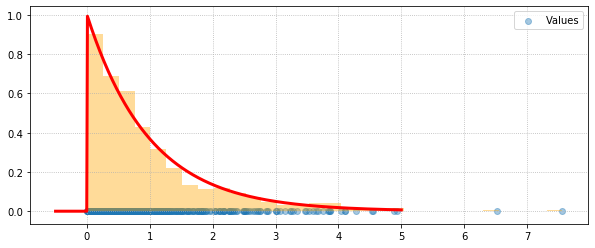

In [33]:
size = 100
grid = np.linspace(-0.5, 5, 500)

sample = expon(size, 1, 100)
plt.figure(figsize = (10, 4))
plt.scatter(
    sample,
    np.zeros(size),
    alpha=0.4,
    label='Values'
)

plt.hist(
    sample,
    bins=30,
    density=True,
    alpha=0.4,
    color="Orange"
)

plt.plot(
    grid,
    sps.expon.pdf(grid),
    color="red",
    linewidth=3,
    label=""
)
plt.legend()
plt.grid(ls=':')
plt.show()

**Вывод по задаче:**

C помощью равномерного распределения на [0,1] можно воссоздать нормальное и экспоненциальное распределения с произвольными параметрами.

### <font color="blue"><i>Легкая часть: матричное умножение</i></font>

### Задача 2
Напишите функцию, реализующую матричное умножение. При вычислении разрешается создавать объекты размерности три. Запрещается пользоваться функциями, реализующими матричное умножение, например, `numpy.dot`, операция `@`, операция умножения в классе `numpy.matrix`, суммы Эйнштейна и прочие. Разрешено пользоваться только простыми поэлементными векторно-арифметическими операциями над `numpy.array`, любыми операциями изменения формы массива. 

*Авторское решение занимает одну строчку.*

In [27]:
def matrix_multiplication(A, B): 
    return (A.reshape(A.shape[0], A.shape[1], 1) * B).sum(axis= 1)

Проверьте правильность реализации на случайных матрицах. Должен получится ноль, либо очень малое число в пределах машинной точности.

In [28]:
A = sps.uniform.rvs(size=(10, 20))
B = sps.uniform.rvs(size=(20, 30))
np.abs(matrix_multiplication(A, B) - A @ B).sum()

7.638334409421077e-14

На основе опыта: вот в таком стиле многие из вас присылали бы нам свои работы, если не стали бы делать это задание :)

In [29]:
def stupid_matrix_multiplication(A, B):
    C = [[0 for j in range(len(B[0]))] for i in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j]
    return C

Проверьте, насколько быстрее работает ваш код по сравнению с неэффективной реализацией `stupid_matrix_multiplication`. Эффективный код на авторском ноутбуке работает почти в 200 раз быстрее. Для примера посмотрите также, насколько быстрее работают встроенные `numpy`-функции.

In [30]:
A = sps.uniform.rvs(size=(400, 200))
B = sps.uniform.rvs(size=(200, 300))

%time C1 = matrix_multiplication(A, B)
%time C2 = A @ B  # python 3.5
%time C3 = np.matrix(A) * np.matrix(B)
%time C4 = stupid_matrix_multiplication(A, B)
%time C5 = np.einsum('ij,jk->ik', A, B) 

CPU times: user 54.7 ms, sys: 16.5 ms, total: 71.2 ms
Wall time: 74.3 ms
CPU times: user 17 ms, sys: 8.99 ms, total: 26 ms
Wall time: 9.52 ms
CPU times: user 3.16 ms, sys: 3.07 ms, total: 6.24 ms
Wall time: 2.08 ms
CPU times: user 33.8 s, sys: 220 ms, total: 34 s
Wall time: 33.7 s
CPU times: user 8.97 ms, sys: 112 µs, total: 9.09 ms
Wall time: 8.75 ms


Ниже для примера приведена полная реализация функции. Ваc мы, конечно, не будем требовать проверять входные данные на корректность, но документации к функциям нужно писать.

In [31]:
def matrix_multiplication(A, B):
    '''Возвращает матрицу, которая является результатом
    матричного умножения матриц A и B.
    
    '''
    
    # Если A или B имеют другой тип, нужно выполнить преобразование типов
    A = np.array(A)
    B = np.array(B)
    
    # Проверка данных входных данных на корректность
    assert A.ndim == 2 and B.ndim == 2, 'Размер матриц не равен 2'
    assert A.shape[1] == B.shape[0], \
        ('Матрицы размерностей {} и {} неперемножаемы'.format(A.shape, B.shape))
    
    C = (A[..., np.newaxis] * B).sum(axis= 1)
    
    return C

a = np.array([[1,2,3],[2,3,4]])
b = np.array([[1,2,3], [2,3,4], [4,5,6]])
print(matrix_multiplication(a,b))

[[17 23 29]
 [24 33 42]]


### <font color="orange"><i>Сложная часть: броуновское движение</i></font>

### Задача 3

<a target="_blank" href="https://ru.wikipedia.org/wiki/Броуновское_движение">Броуновское движение</a> — беспорядочное движение микроскопических видимых взвешенных частиц твёрдого вещества в жидкости или газе, вызываемое тепловым движением частиц жидкости или газа. 

Математически броуновское движение обычно моделируется как некоторая случайная функция $X_t$ аргумента $t$, который несет смысл времени. В каждый фиксированный момент времени $t$, значение $X_t$ является случайной величиной, характеризующей положение частицы в момент времени $t$. Считается, что для любого интервала времени $(s, t)$ перемещение (точнее, приращение) частицы за этот интервал времени имеет нормальное распределение: $X_t - X_s \sim \mathcal{N}(0, (t-s)\sigma^2)$. Причем величина $X_t - X_s$ не зависит от приращения частицы за другие интервалы времени, не пересекающиеся с интервалом $(s, t)$. Математическая корректность данного определения будет доказана в курсе случайных процессов.

Многомерное броуновское движение соответствует одномерным по каждой координате.

Сгенерировать траекторию частицы в интервале времени $(0, T)$ в предположении броуновского движения можно следующим образом:
1. Выбрать начальное положение, обычно это начало координат.
2. Разбить интервал $(0, T)$ равномерно на интервалы длины $\Delta t$. Величина $\Delta t$ должна быть достаточно мала, в частности, на графиках не должно быть видно дискретности компьютерной генерации. 
3. Сгенерировать приращение частицы на каждом интервале по каждой координате независимо из распределения $\mathcal{N}(0, \sigma^2 \Delta t)$.
4. Для получения значений $X_t$ просуммировать необходимые приращения.



**1.**
Реализуйте функцию семплирования траекторий броуновского движения. Функция должна принимать в качестве аргументов:
- Параметр $\sigma$;
- Время $T$;
- Количество интервалов длины $\Delta t$;
- Размерность пространства, в котором реализуется траектория;
- Количество различных частиц, для которых нужно сгенерировать траектории.

Функция должна вернуть трехмерный массив `result`, где `result[i, j, k]` &mdash; значение $j$-й координаты $i$-й частицы на $k$-м шаге.

При реализации считайте, что все частицы в начальный момент времени находятся в начале координат.
Функцию нужно реализовать для произвольной размерности, не используя циклы. Можно использовать функции из `scipy`.

In [32]:
def generate_brownian_motion(sigma, time, steps, dim, num_particles):
    delta_t = time / steps
    return sps.norm(0,delta_t*(sigma ** 2)).rvs((num_particles,dim,steps)).cumsum(axis=2)

**2.**
Визуализируйте траектории для двумерного броуновского движения для трех разных значений $\sigma$. Число интервалов не менее 10000. Для каждого значения $\sigma$ постройте 6 разных частиц в виде сетки графиков $2 \times 3$. Координатные оси должны иметь одинаковый масштаб.

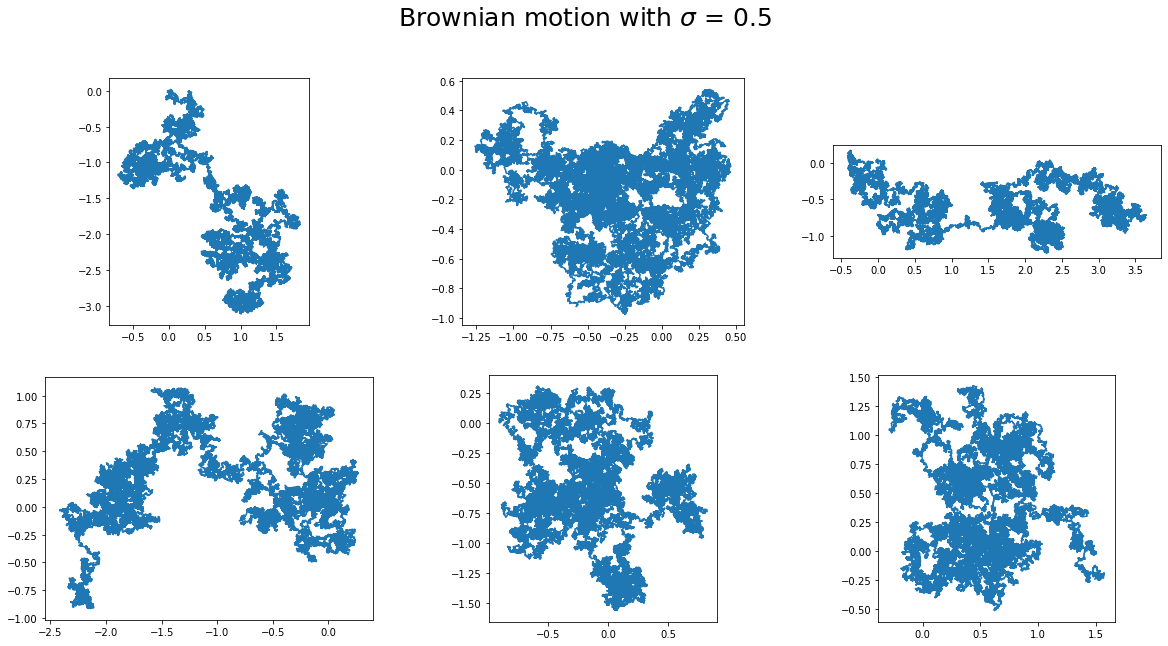

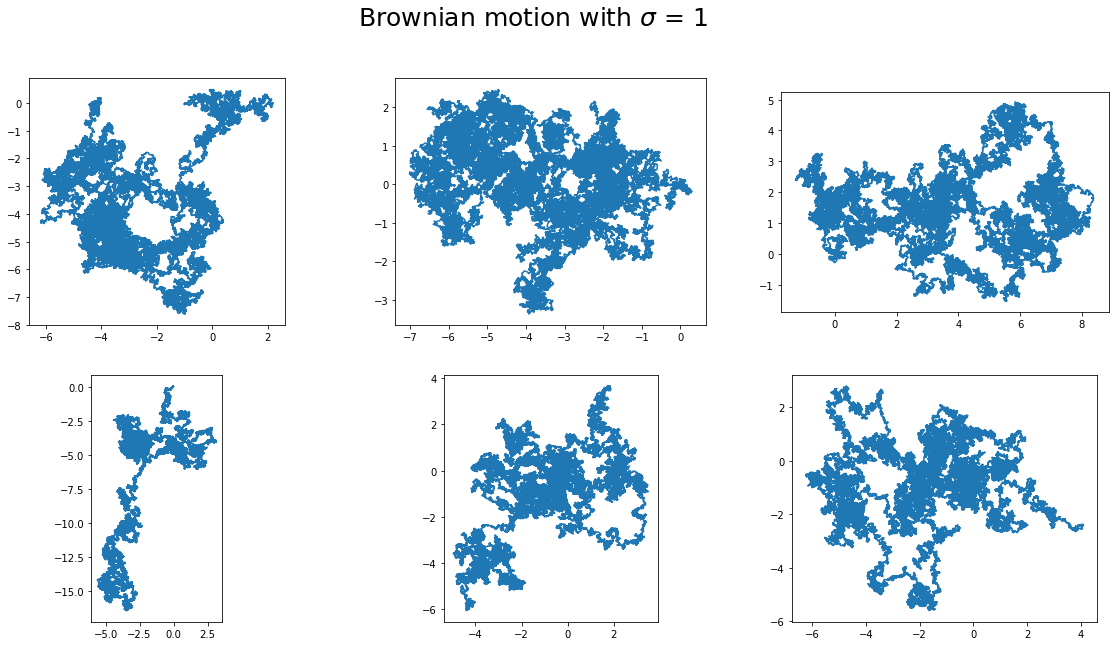

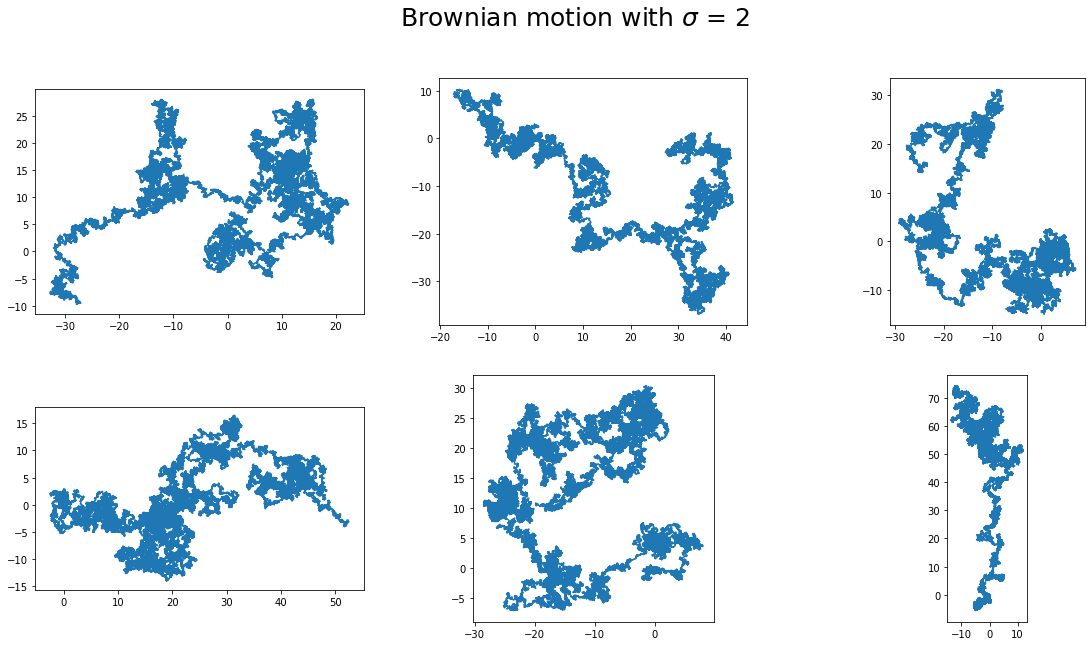

In [33]:
sigmas = [0.5,1,2]
time = 2000
steps = 100000
for sigma in sigmas:
    fig, ax = plt.subplots(2,3,figsize = (20,10))
    fig.suptitle(f'Brownian motion with $\sigma$ = {sigma}' , fontsize = 25)
    results = generate_brownian_motion(sigma,time, steps, 2, 6)
    for ax, (x,y) in zip(ax.flat, results):
        ax.set_aspect('equal', 'box')
        ax.plot(
            x,
            y
        )


Как вид траектории зависит от $\sigma$?

При увеличении $\sigma$ частица уходит от нуля, то есть ее траектория растягивается

Сгенерируйте траекторию в трехмерном пространстве и постройте для нее 3D-график.

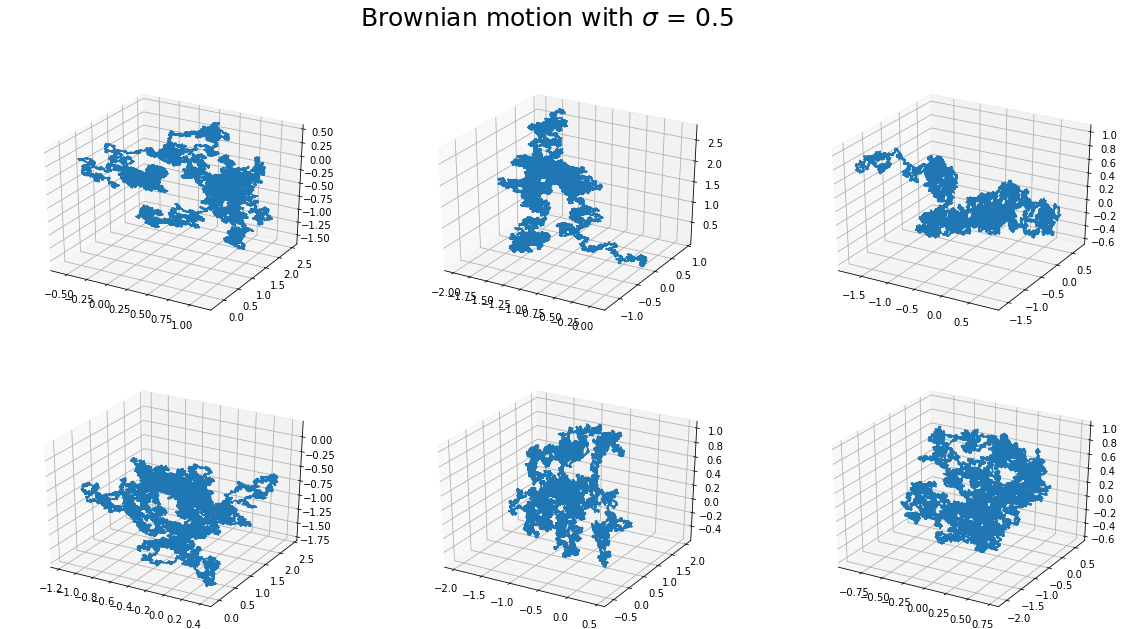

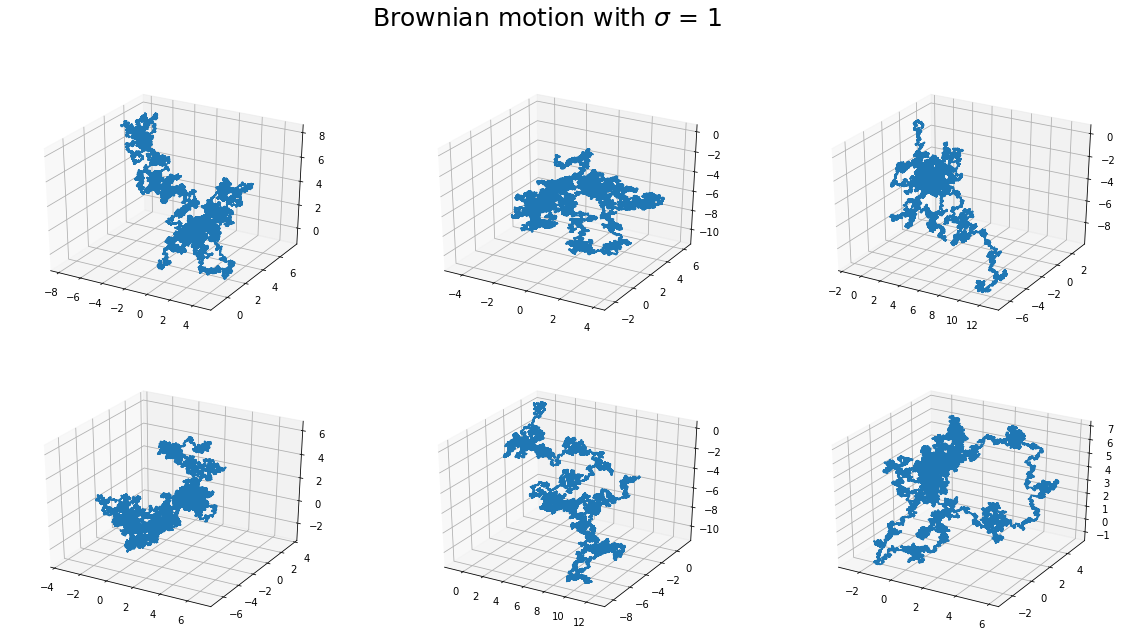

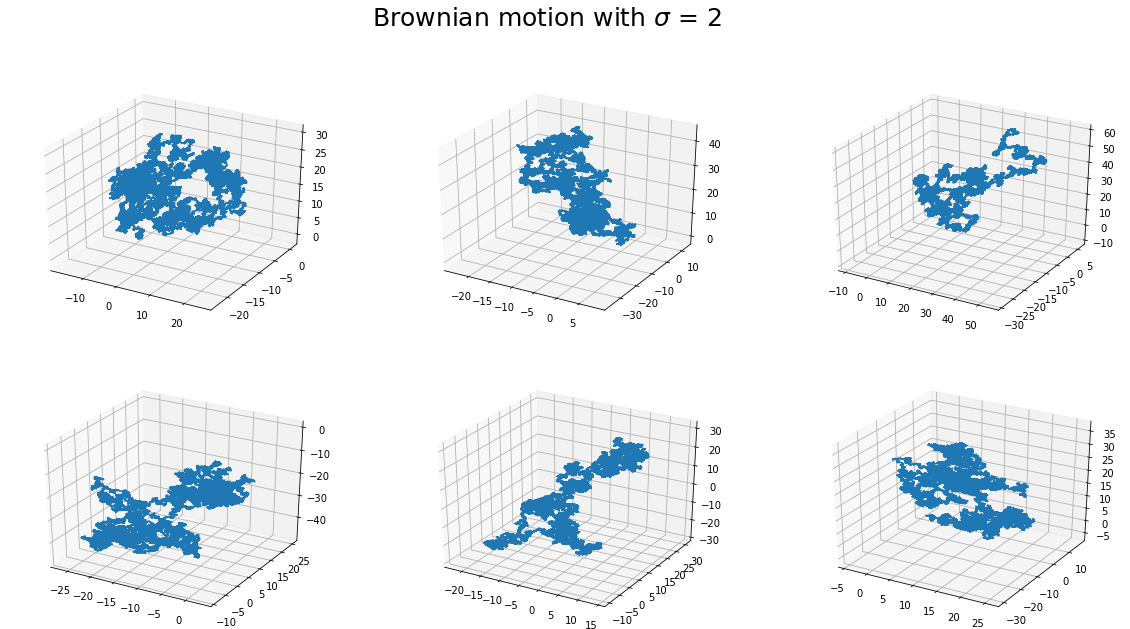

In [34]:
sigmas = [0.5,1,2]
time = 2000
steps = 100000
for sigma in sigmas:
    fig, ax = plt.subplots(2,3,figsize = (20,10),  subplot_kw=dict(projection='3d'))
    fig.suptitle(f'Brownian motion with $\sigma$ = {sigma}' , fontsize = 25)
    results = generate_brownian_motion(sigma,time, steps, 3, 6)
    for ax, (x,y,z) in zip(ax.flat, results):
        ax.plot(
            x,
            y,
            z
        )


**3.** Исследуйте, как зависит среднее расстояние частицы до начала координат от времени и от параметра $\sigma$. Проведите исследование для разных размерностей пространства. Под средним в теории понимается математическое ожидание. На практике нужно исследовать его оценку посредством генерации множества траекторий.

В исследовании обязательно дожны присутствовать текстовые пояснения и графики. Сделайте выводы.

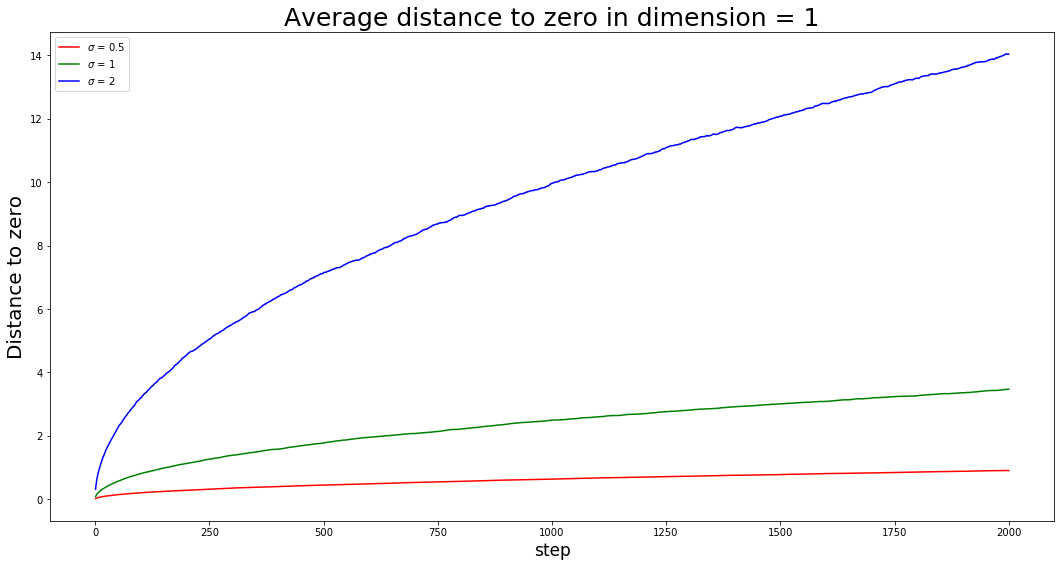

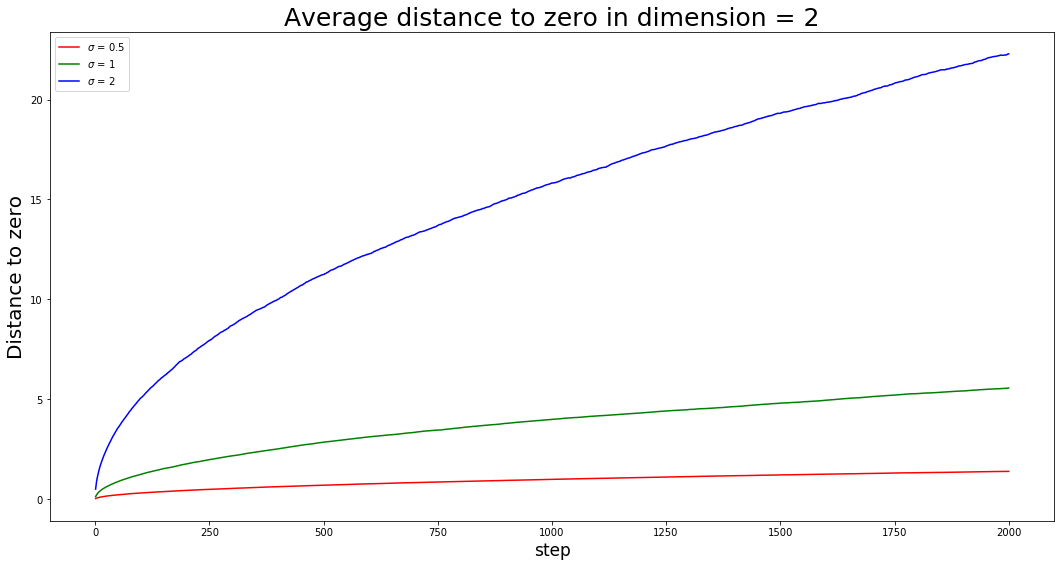

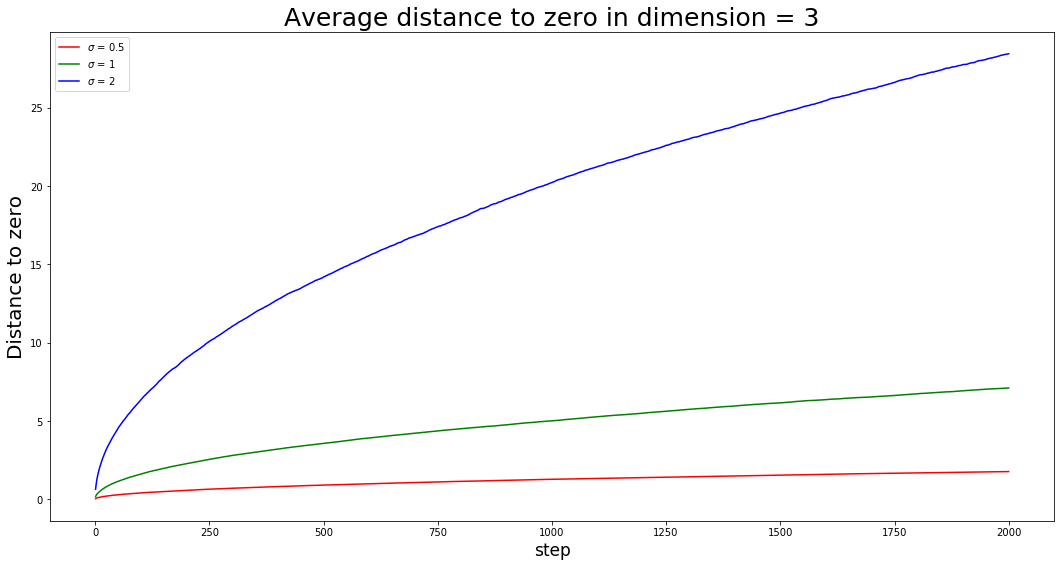

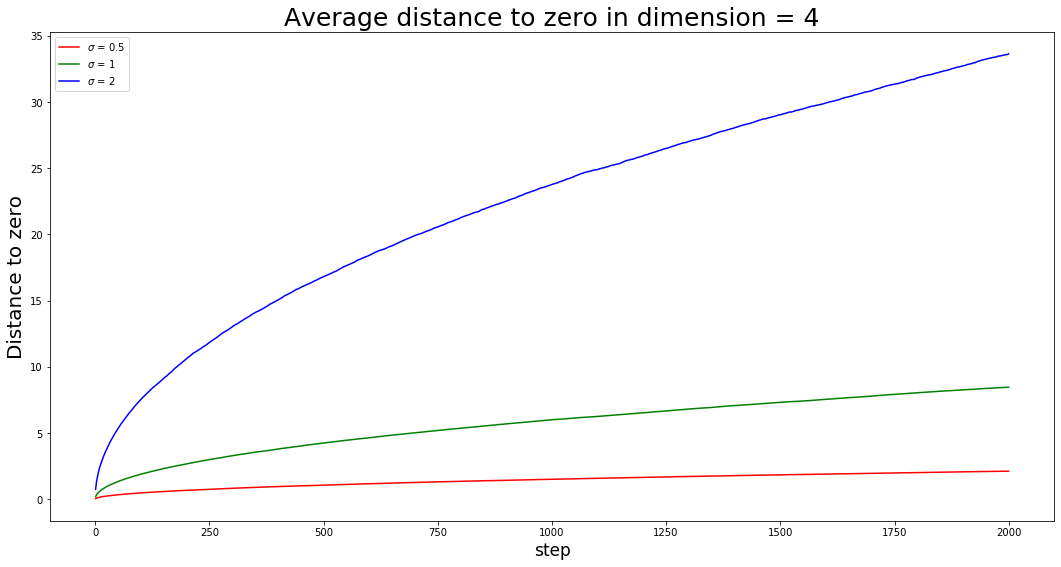

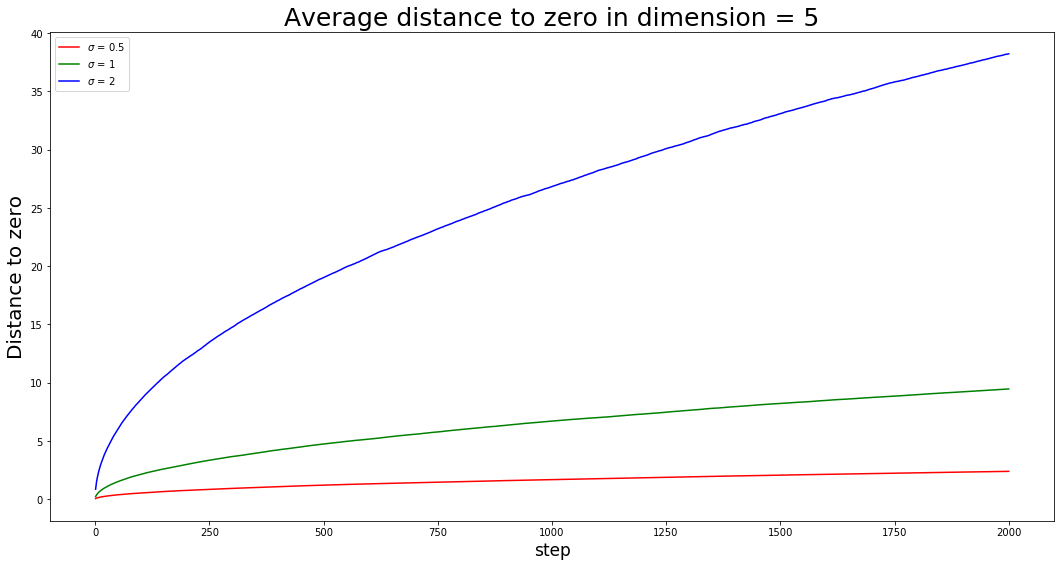

In [36]:
time = 200
steps = 2000
particles = 5000
grid = np.linspace(1,steps,steps)
sigmas = [0.5,1,2]
colors = ['red', 'green', 'blue']
for dim in range(1,6):
    plt.figure(figsize = (18,9))
    plt.title(f'Average distance to zero in dimension = {dim}',fontsize=25)
    plt.ylabel("Distance to zero", fontsize = 20)
    plt.xlabel("step", fontsize = 17)
    for sigma,color in zip(sigmas,colors):
        data = generate_brownian_motion(sigma, time, steps, dim, particles)
        distances = np.linalg.norm(data, axis = 1)
        plt.plot(
            grid,
            np.average(distances, axis = 0),
            color = color,
            label = f'$\sigma$ = {sigma}'
        )
    plt.legend()
        

По графикам можно сделать вывод, что среднее расстояние от частицы до нуля в зависимости от времени будет отписываться законом $y = c \cdot \sqrt t$, где $c$ -- некоторая константа. Зависимость от $\sigma$ -- квадратичная. Зависимость от размерности -- линейная.

### <font color="orange"><i>Сложная часть: визуализация распределений</i></font>

### Задача 4

В этой задаче вам нужно исследовать свойства дискретных распределений и абсолютно непрерывных распределений.

Для перечисленных ниже распределений нужно  
1. На основе графиков дискретной плотности (функции массы) для различных параметров пояснить, за что отвечает каждый параметр.  
2. Сгенерировать набор независимых случайных величин из этого распределения и построить по ним гистограмму.  
3. Сделать выводы о свойтсвах параметров каждого из распределений.

Распределения:
* Бернулли 
* Биномиальное
* Дискретное равномерное
* Геометрическое

Для выполнения данного задания можно использовать код с лекции. Можно использовать функции из `scipy`. Сделать виджеты недостаточно, поскольку они не сохраняются.

## Common functions

In [37]:
def discrete_density_subplots(distrib_funcs, general_label, colors, legend_labels, grid, subgraph_size)-> None:
    fig, ax = plt.subplots(1,len(distrib_funcs),figsize = subgraph_size)
    fig.suptitle(general_label, fontsize = 25)
    for axe, func, legend, color in zip(ax.flat, distrib_funcs, legend_labels, colors): 
        axe.bar(
        grid,
        func.pmf(grid),
        color = color,
        label = legend
    
    )
        axe.legend()

def discrete_rvs_subplots(distrib_funcs,size, general_label,colors, legend_labels, subgraph_size)-> None:
    fig, ax = plt.subplots(1,len(distrib_funcs),figsize = subgraph_size)
    fig.suptitle( general_label, fontsize = 25)
    for axe, func, legend, color in zip(ax.flat, distrib_funcs, legend_labels, colors):
        axe.hist(
            func.rvs(size),
            label = legend,
            color = color
        )
        axe.legend()
    

def discrete_density_one_plot(distib_funcs, general_label, colors, legend_labels, grid, graph_size) -> None:
    plt.figure(figsize = graph_size)
    plt.title(general_label)
    plt.ylabel('Density', fontsize = 25)
    for func, color, legend in zip(distrib_funcs, colors, legend_labels):
        plt.bar(
            grid,
            func.pmf(grid),
            alpha = 0.4,
            color = color,
            label = legend
        )

    plt.legend()
    return

def discrete_rvs_one_plot(distrib_funcs,size, general_label,colors, legend_labels, graph_size) -> None:
    plt.figure(figsize = graph_size)
    plt.title(general_label)
    plt.ylabel('Distirbution', fontsize  = 25)
    for func, color, legend in zip(distrib_funcs, colors, legend_labels):
        plt.hist(
            func.rvs(size),
            bins = 60,
            alpha = 0.4,
            color = color,
            label = legend
        )
   
    plt.legend()
    return

## Bernoulli distribution

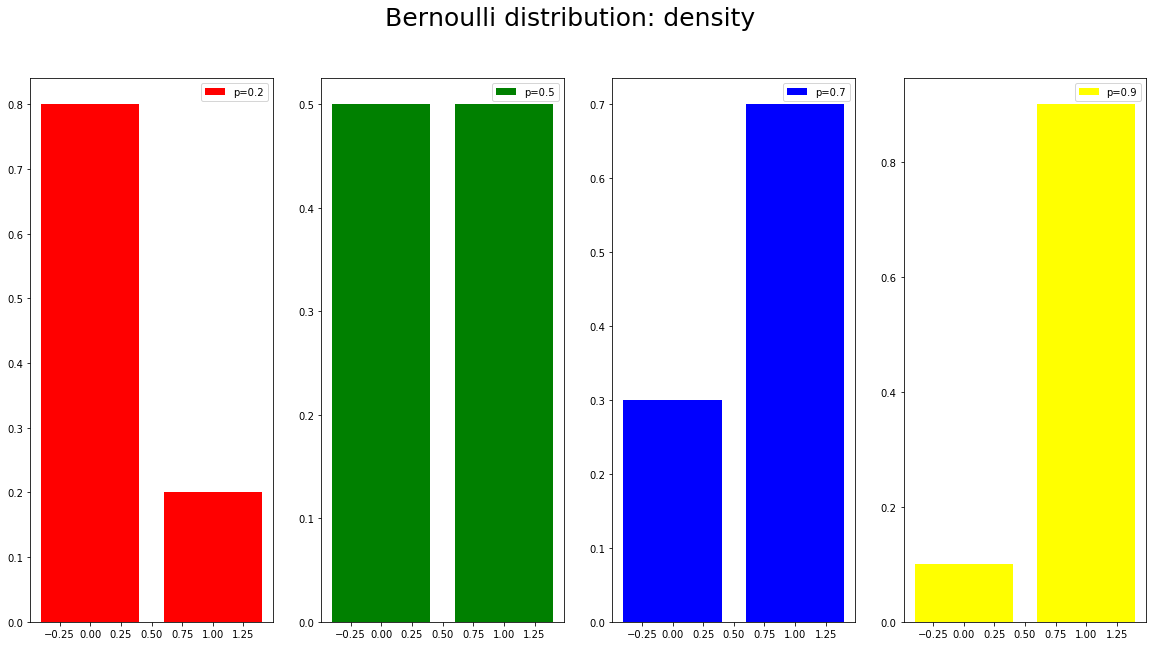

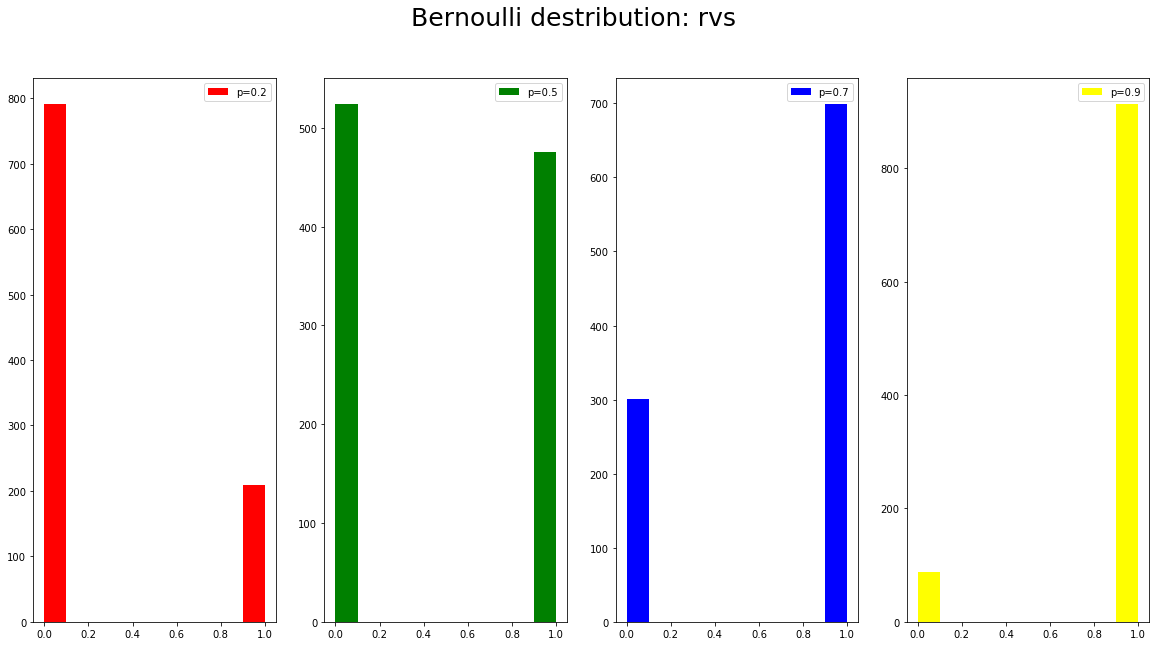

In [38]:
subgraph_size = (20,10)
size = 1000
grid = np.linspace(0,1,2)
distrib_funcs = [sps.bernoulli(0.2),sps.bernoulli(0.5),sps.bernoulli(0.7),sps.bernoulli(0.9)]
legend_labels = ["p=0.2","p=0.5","p=0.7","p=0.9"]
colors = ["red", "green", "blue", "yellow"]
general_label1, general_label2 = "Bernoulli distribution: density", "Bernoulli destribution: rvs"
discrete_density_subplots(distrib_funcs, general_label1, colors, legend_labels, grid, subgraph_size)
discrete_rvs_subplots(distrib_funcs,size, general_label2,colors, legend_labels, subgraph_size)

**Вывод по задаче:** Чем больше $p$, тем больше вероятность того, что случайная величина примет значение 1.

## Binomial distribution

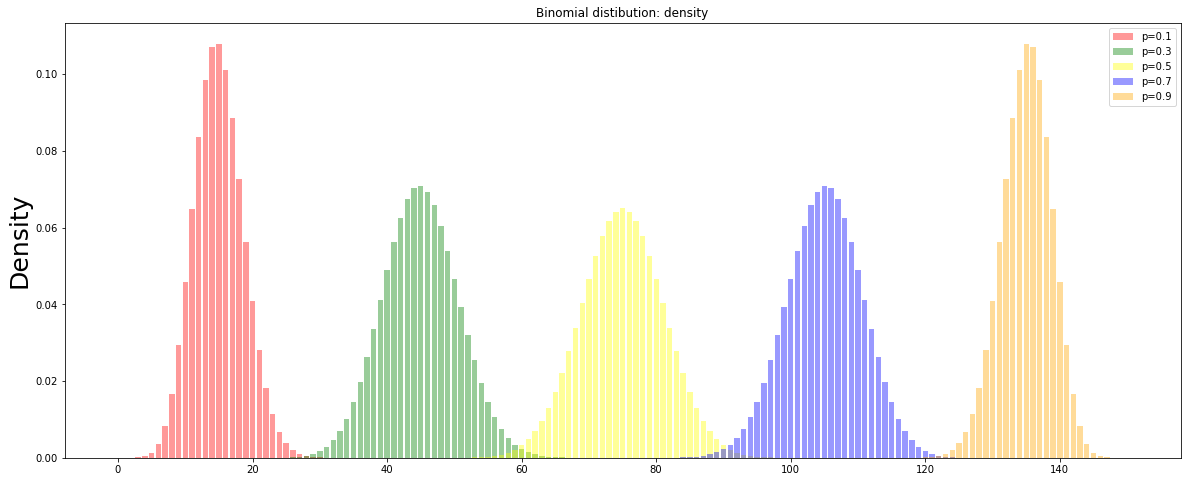

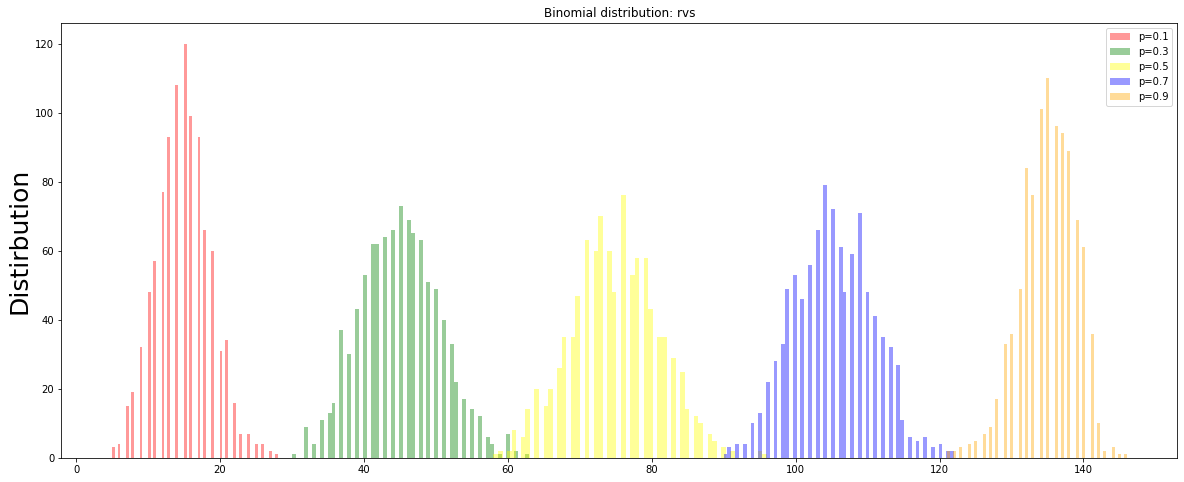

In [39]:
distrib_funcs = [sps.binom(150,0.1),sps.binom(150,0.3),sps.binom(150,0.5),sps.binom(150,0.7),sps.binom(150,0.9)]
general_label1, general_label2 = "Binomial distibution: density", "Binomial distribution: rvs"
size = 1000
grid = np.linspace(0,150,151)
graph_size = (20,8)
colors = ["red", 'green', 'yellow', 'blue', 'orange']
legend_labels = ["p=0.1","p=0.3","p=0.5","p=0.7", "p=0.9"]
discrete_density_one_plot(distrib_funcs,general_label1,colors,legend_labels,grid, graph_size)
discrete_rvs_one_plot(distrib_funcs, size,general_label2,colors,legend_labels, graph_size)

**Вывод по задаче:**  Чем больше $p$, тем больше значения случайной величины.

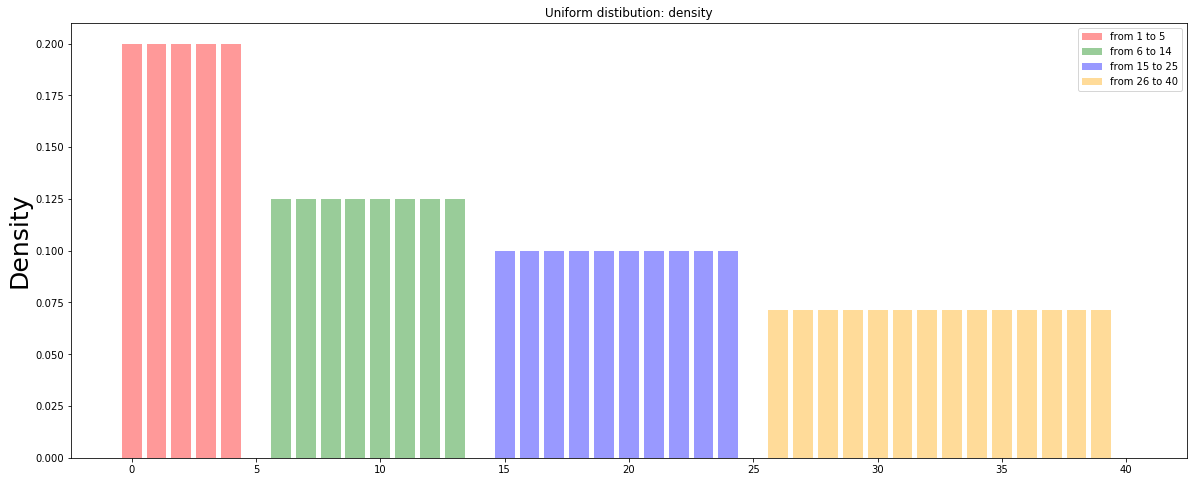

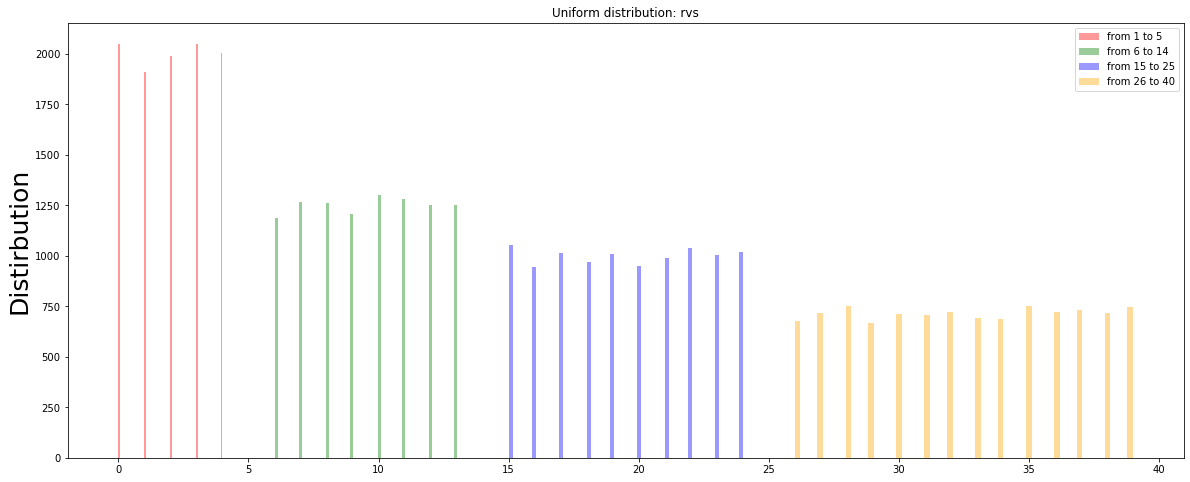

In [40]:
distrib_funcs = [sps.randint(0,5),sps.randint(6,14),sps.randint(15,25),sps.randint(26,40)]
general_label1, general_label2 = "Uniform distibution: density", "Uniform distribution: rvs"
size = 10000
grid = np.linspace(0,40,41)
graph_size = (20,8)
colors = ["red", 'green', 'blue', 'Orange']
legend_labels = ["from 1 to 5","from 6 to 14","from 15 to 25", "from 26 to 40"]
discrete_density_one_plot(distrib_funcs,general_label1,colors,legend_labels, grid,graph_size)
discrete_rvs_one_plot(distrib_funcs, size,general_label2,colors,legend_labels, graph_size)

**Вывод по задаче:** Чем больше расстояние между параметрами $a$ и $b$, тем меньше вероятность того, что случайная величина примет одно определенное значение. 

## Geom distribution

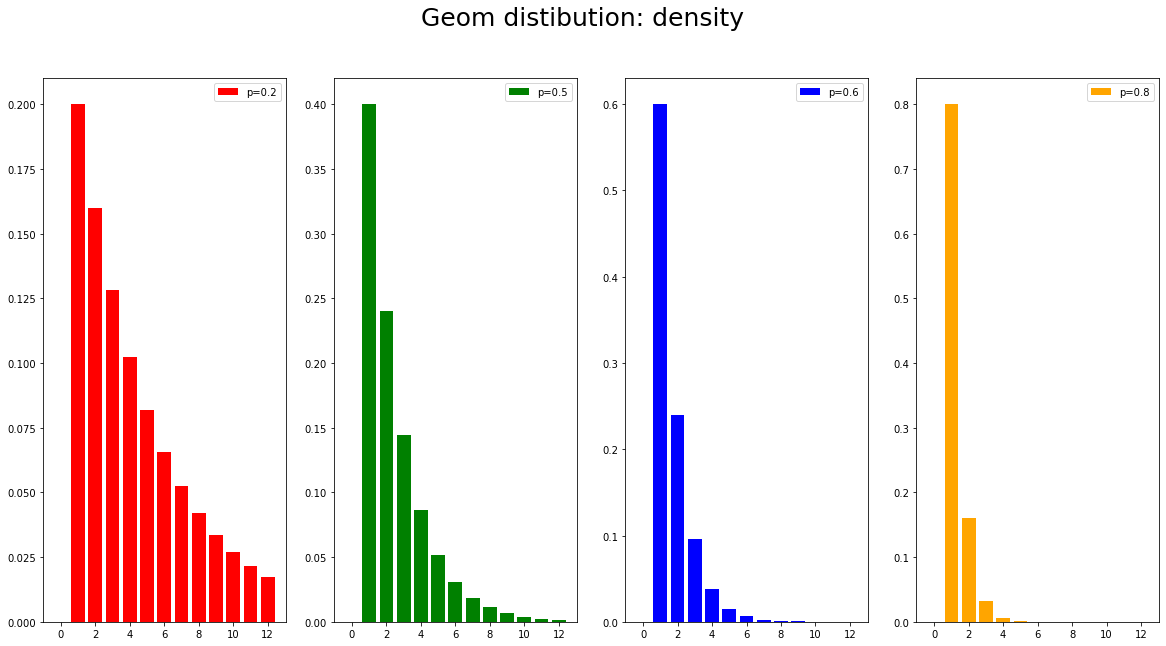

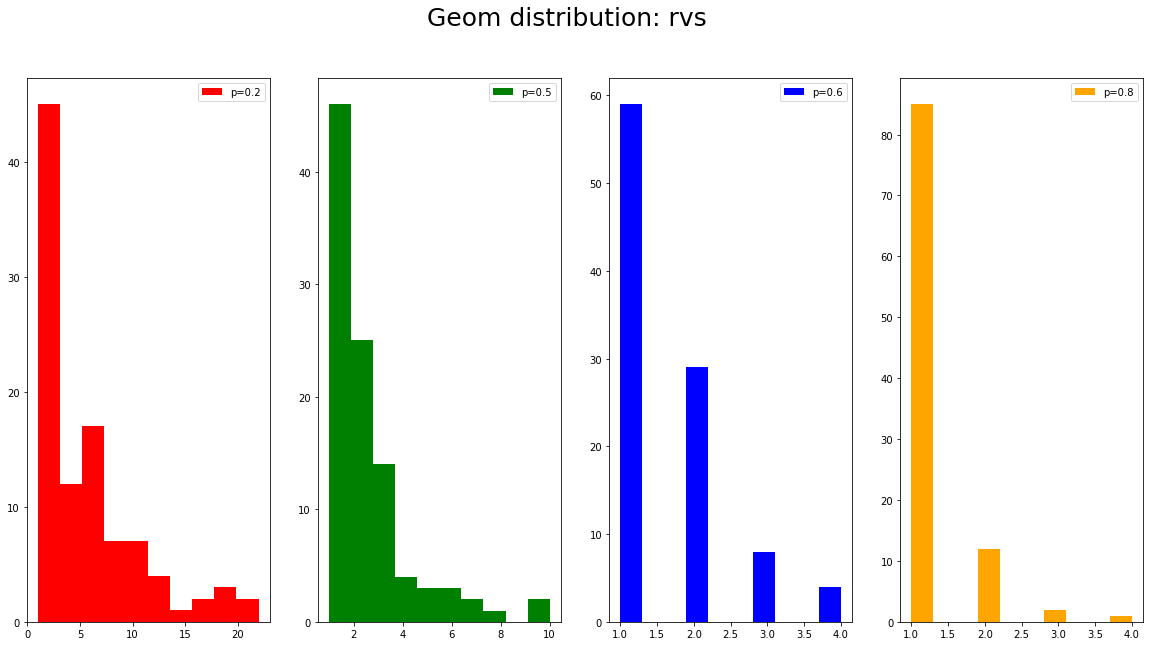

In [41]:
#

subgraph_size = (20,10)
size = 100
grid = np.linspace(0,12,13)
distrib_funcs = [sps.geom(0.2),sps.geom(0.4),sps.geom(0.6),sps.geom(0.8)]
legend_labels = ["p=0.2","p=0.5","p=0.6","p=0.8"]
colors = ["red", 'green', 'blue', 'Orange']
general_label1, general_label2 = "Geom distibution: density", "Geom distribution: rvs"
discrete_density_subplots(distrib_funcs, general_label1, colors, legend_labels, grid, subgraph_size)
discrete_rvs_subplots(distrib_funcs,size, general_label2,colors, legend_labels, subgraph_size)

**Вывод по задаче:** Чем больше $p$, тем больше вероятность того, что случайная величина примет значение 1.